In [7]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [8]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [9]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [10]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [11]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [13]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [14]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [15]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [16]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [17]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

Race analysis

In [19]:
skimmed_df['applicant_race_1']

0          5
1          2
2          6
3          5
4          5
          ..
1157690    7
1157691    4
1157692    6
1157693    6
1157694    7
Name: applicant_race_1, Length: 1157695, dtype: int64

In [33]:
RaceMap=code_map['race'].copy()
#genderMap[3]='Information not provided by applicant'

In [34]:
RaceMap

{1: 'American Indian or Alaska Native',
 2: 'Asian',
 3: 'Black or African American',
 4: 'Native Hawaiian or Other Pacific Islander',
 5: 'White',
 6: 'Information not provided by applicant in mail, Internet, or telephone application',
 7: 'Not applicable',
 8: 'No co-applicant'}

<AxesSubplot:title={'center':'Race Composition for All Applicants'}, ylabel='applicant_race_1'>

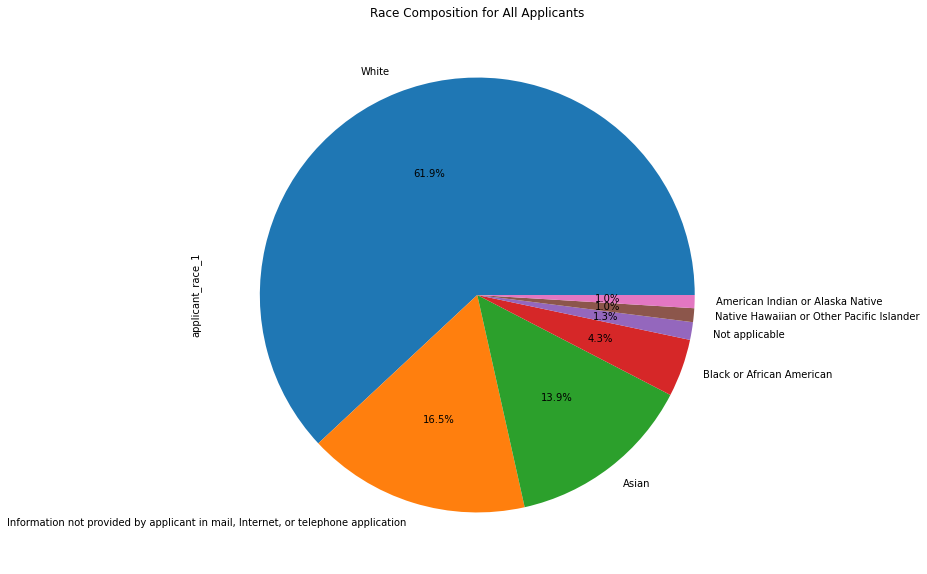

In [36]:
Race_total=skimmed_df['applicant_race_1'].value_counts()
plt.figure(figsize=(10,10))
Race_total=Race_total.rename(index=RaceMap)
Race_total.plot.pie(legend=False, title='Race Composition for All Applicants',autopct='%1.1f%%')
#plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')